<a href="https://colab.research.google.com/github/bhgtankita/MYWORK/blob/master/Grad_CAM_RESNET18_Transfer_Learning_on_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing image-classifiers on Colab

In [2]:
!pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-z2m8kinc
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-z2m8kinc
  Running command git submodule update --init --recursive -q
  Stored in directory: /tmp/pip-ephem-wheel-cache-tuk0gj1d/wheels/de/2b/fd/29a6d33edb8c28bc7d94e95ea1d39c9a218ac500a3cfb1b197
Successfully built image-classifiers


# Import Dependencies

In [3]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D
from classification_models.resnet import ResNet18, preprocess_input
import keras.backend as K
import shutil, os
from google.colab.patches import cv2_imshow
import cv2

Using TensorFlow backend.


# Preparing data

In [4]:
# prepare your data
(X_train, y_train), (X_test, y_test) = cifar10.load_data() 
X_train.shape, X_test.shape, np.unique(y_train).shape[0]
# one-hot encoding
n_classes = 10
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
classname = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}

# Visualisation of CIFAR-10 images

Shape of each image in the training data:  (32, 32, 3)


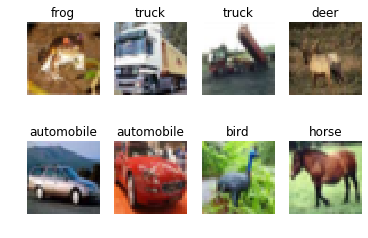

In [12]:
for i in range(1, 9):
    img = X_train[i-1]
    plt.subplot(2, 4, i)
    plt.imshow(img)
    plt.axis('off')
    plt.title(classname[np.argmax(y_train[i-1])])

print("Shape of each image in the training data: ", X_train.shape[1:])

# Transfer learning on ResNet18 and training for 10 epochs on Cifar-10

In [13]:
n_classes = 10

# build model
base_model = ResNet18(input_shape=(32,32,3), weights='imagenet', include_top=False)
# for layer in base_model.layers:
#     layer.trainable = False
x = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation='softmax')(x)
model = keras.models.Model(inputs=[base_model.input], outputs=[output])
model.summary()

# training
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, nb_epoch=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)

W0724 07:50:35.204188 139762468792192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 07:50:35.270150 139762468792192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0724 07:50:35.271574 139762468792192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0724 07:50:35.273016 139762468792192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0724 07:50:35.275072 139762

44924928/44920640 [==============================] - 2s 0us/step


W0724 07:50:44.598473 139762468792192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn0 (Batch

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  
W0724 07:50:44.770929 139762468792192 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 64s 1ms/step - loss: 1.0527 - acc: 0.6374 - val_loss: 0.7632 - val_acc: 0.7395
Epoch 2/10
50000/50000 [==============================] - 58s 1ms/step - loss: 0.6479 - acc: 0.7736 - val_loss: 0.6846 - val_acc: 0.7646
Epoch 3/10
50000/50000 [==============================] - 58s 1ms/step - loss: 0.5063 - acc: 0.8230 - val_loss: 0.6724 - val_acc: 0.7765
Epoch 4/10
50000/50000 [==============================] - 58s 1ms/step - loss: 0.3918 - acc: 0.8630 - val_loss: 0.6614 - val_acc: 0.7851
Epoch 5/10
50000/50000 [==============================] - 58s 1ms/step - loss: 0.3070 - acc: 0.8915 - val_loss: 0.6823 - val_acc: 0.7928
Epoch 6/10
50000/50000 [==============================] - 58s 1ms/step - loss: 0.2308 - acc: 0.9206 - val_loss: 0.7061 - val_acc: 0.7895
Epoch 7/10
50000/50000 [==============================] - 58s 1ms/step - loss: 0.1755 - acc: 0.9403 - val_loss: 0.7602 - val_acc

# Evaluating Model

In [14]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 6s 587us/step


[0.838464139008522, 0.799]

# Collecting misclassified images in test dataset

In [0]:
actual = np.argmax(y_test, axis=1)
prediction=[]
accuracy=[]
# TruePred=[]
incorrect_pred = []
correct_pred = []
incorrect_class = []
predictions = []
actuals = []

for idx, val in enumerate(X_test):
  val = np.expand_dims(val, axis=0)
  pred = model.predict(val)
  predicted_value = np.argmax(pred, axis=1)
  prediction.append(predicted_value)
  accuracy.append(np.amax(pred, axis=1)*100)
  if actual[idx] != predicted_value:
      incorrect_pred.append(idx)
      predictions.append(int(predicted_value))
      actuals.append(int(actual[idx]))
  else:
      correct_pred.append(idx)

In [37]:
print(predictions)
print(actuals)

[1, 8, 3, 6, 9, 4, 8, 7, 8, 4, 2, 5, 5, 3, 1, 0, 5, 5, 7, 0, 2, 2, 7, 5, 2, 6, 6, 1, 5, 2, 3, 3, 2, 6, 8, 0, 3, 0, 3, 5, 5, 2, 5, 3, 1, 3, 8, 0, 2, 8, 6, 3, 4, 9, 2, 8, 1, 5, 9, 4, 0, 3, 5, 1, 2, 1, 3, 5, 4, 0, 2, 9, 8, 0, 8, 5, 7, 9, 8, 4, 5, 8, 3, 3, 9, 2, 5, 2, 3, 3, 7, 5, 4, 3, 2, 8, 5, 0, 0, 4, 5, 7, 0, 8, 1, 3, 2, 4, 5, 5, 8, 2, 8, 8, 0, 9, 3, 6, 5, 2, 6, 0, 2, 7, 7, 0, 1, 7, 1, 4, 4, 0, 3, 2, 7, 5, 3, 7, 8, 0, 5, 0, 1, 6, 7, 3, 0, 4, 0, 6, 5, 1, 4, 6, 3, 2, 2, 2, 2, 5, 3, 2, 5, 3, 9, 3, 1, 4, 2, 5, 2, 8, 4, 3, 6, 3, 7, 7, 3, 3, 2, 5, 3, 1, 7, 6, 8, 2, 5, 1, 1, 7, 5, 2, 0, 5, 6, 3, 3, 3, 2, 2, 7, 0, 3, 7, 3, 6, 1, 1, 8, 5, 8, 1, 3, 5, 9, 8, 1, 9, 7, 7, 4, 1, 1, 3, 5, 1, 2, 0, 7, 5, 3, 1, 4, 5, 3, 4, 8, 4, 1, 1, 6, 0, 1, 5, 0, 3, 0, 2, 7, 8, 6, 6, 0, 9, 5, 1, 7, 4, 5, 2, 7, 8, 8, 2, 5, 2, 3, 6, 5, 2, 1, 2, 3, 7, 2, 0, 5, 5, 0, 3, 1, 5, 6, 3, 3, 3, 7, 8, 0, 5, 5, 3, 2, 3, 2, 6, 9, 3, 9, 3, 6, 1, 5, 2, 7, 9, 2, 5, 2, 0, 4, 6, 2, 3, 8, 3, 8, 0, 8, 2, 5, 6, 1, 8, 6, 8, 3, 9, 5, 5, 5, 

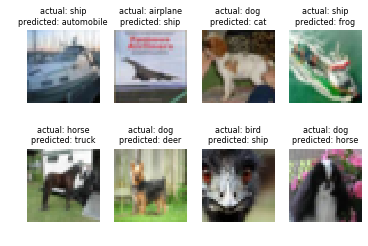

In [41]:
for i in range(1, 9):
    img = X_test[incorrect_pred[i-1]]
    plt.subplot(2, 4, i)
    plt.imshow(img)
    plt.axis('off')
    plt.title("actual: %s\npredicted: %s" % (classname[actuals[i-1]], classname[predictions[i-1]]), fontsize=8)

# Helper Function

In [0]:
def process_image(idx_image):
  x = X_test[idx_image]
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  return x

In [43]:
misclassified = incorrect_pred[:50]
len(misclassified)

50

# Applying Grad-CAM on 50 misclassified images

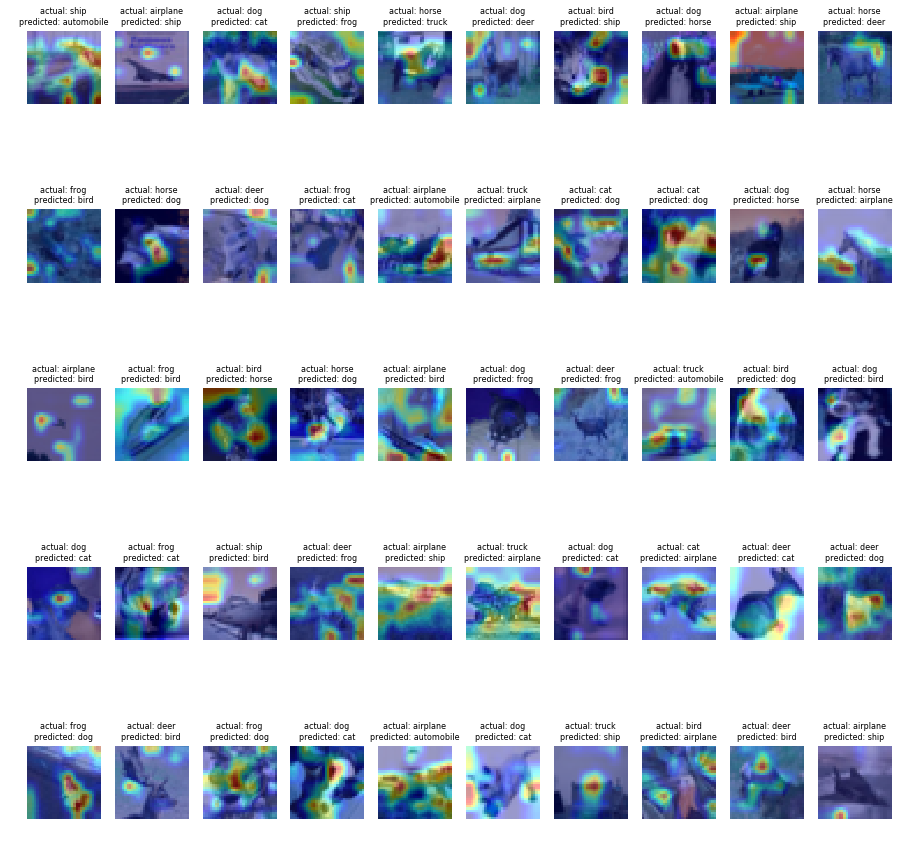

In [66]:
counter=0
for index, value in enumerate(X_test):
  if counter < 50:
    if index == misclassified[counter]:
      x = process_image(index)
      preds = model.predict(x)
      class_idx = np.argmax(preds[0])
      class_output = model.output[:, class_idx]
      last_conv_layer = model.get_layer("add_2") # 8x8x64

      grads = K.gradients(class_output, last_conv_layer.output)[0]
      pooled_grads = K.mean(grads, axis=(0, 1, 2))
      iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
      pooled_grads_value, conv_layer_output_value = iterate([x])
      for i in range(64):
          conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

      heatmap = np.mean(conv_layer_output_value, axis=-1)
      heatmap = np.maximum(heatmap, 0)
      heatmap /= np.max(heatmap)

      img = value
      heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
      heatmap = np.uint8(255 * heatmap)
      heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
      superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
      gradcam = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)
      plt.subplot(5, 10, counter+1)
      plt.imshow(gradcam)
      plt.axis('off')
      plt.title("actual: %s\npredicted: %s" % (classname[actuals[counter]], classname[predictions[counter]]), fontsize=8)
      plt.subplots_adjust(top=7, bottom=4, left=3, right=5)
      counter=counter+1